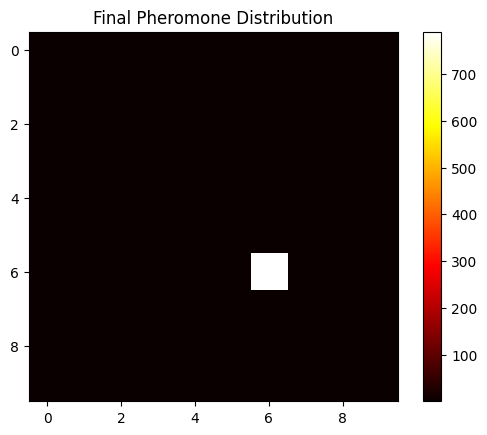

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example: TSP-like problem for image segmentation (simplified grid pathfinding)

def initialize_pheromone_matrix(size, initial_pheromone=1.0):
    """Initialize pheromone matrix with equal values."""
    return np.full((size, size), initial_pheromone)

def compute_transition_probabilities(pheromones, heuristic, alpha=1, beta=2):
    """Compute the probability of transitioning to a pixel."""
    numerator = (pheromones ** alpha) * (heuristic ** beta)
    denominator = np.sum(numerator)
    return numerator / denominator

def evaporate_pheromones(pheromones, evaporation_rate=0.1):
    """Evaporate pheromone levels."""
    return (1 - evaporation_rate) * pheromones

def update_pheromones(pheromones, path, contribution=1):
    """Update pheromone levels based on ant paths."""
    for i, j in path:
        pheromones[i, j] += contribution
    return pheromones

# Grid initialization (Image represented as grid of intensities)
size = 10
grid = np.random.randint(0, 256, size=(size, size))  # Simulating an image

# Pheromone initialization
pheromones = initialize_pheromone_matrix(size)

# ACO main loop
n_iterations = 20
for iteration in range(n_iterations):
    heuristic = grid / np.max(grid)  # Normalize pixel intensities
    path = []  # To store ant paths
    for i in range(size):
        for j in range(size):
            probabilities = compute_transition_probabilities(pheromones, heuristic)
            next_pixel = np.unravel_index(np.argmax(probabilities), probabilities.shape)
            path.append(next_pixel)
            pheromones = update_pheromones(pheromones, [next_pixel])
    pheromones = evaporate_pheromones(pheromones)

# Visualize pheromones
plt.imshow(pheromones, cmap='hot')
plt.title("Final Pheromone Distribution")
plt.colorbar()
plt.show()
